In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
#데이터셋 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WISDM.csv')

In [3]:
df

,0,33,Jogging,4.9106E+13,-0.6946377,12.680544,0.50395286
0,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
1,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
2,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
3,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
4,5,33,Jogging,4.910640e+13,1.375655,-2.492524,-6.510526
...,...,...,...,...,...,...,...
1048569,1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048570,1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048571,1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048572,1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [4]:
#필요없는 컬럼 제거
df.drop(columns=['33'], inplace=True)

In [5]:
df

,0,Jogging,4.9106E+13,-0.6946377,12.680544,0.50395286
0,1,Jogging,4.910610e+13,5.012288,11.264028,0.953424
1,2,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
2,3,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
3,4,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
4,5,Jogging,4.910640e+13,1.375655,-2.492524,-6.510526
...,...,...,...,...,...,...
1048569,1048571,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048570,1048572,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048571,1048573,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048572,1048574,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [6]:
df.drop(columns=['0'], inplace=True)

In [7]:
df.drop(columns=['4.9106E+13'], inplace=True)

In [8]:
df

,Jogging,-0.6946377,12.680544,0.50395286
0,Jogging,5.012288,11.264028,0.953424
1,Jogging,4.903325,10.882658,-0.081722
2,Jogging,-0.612916,18.496431,3.023717
3,Jogging,-1.184970,12.108489,7.205164
4,Jogging,1.375655,-2.492524,-6.510526
...,...,...,...,...
1048569,Standing,-7.930000,5.430000,-0.990000
1048570,Standing,-7.970000,5.130000,-1.140000
1048571,Standing,-7.970000,5.220000,-1.380000
1048572,Standing,-7.930000,5.600000,-1.180000


In [9]:
# 현재 컬럼 이름을 리스트로 가져옵니다.
column_names_as_row = df.columns.tolist()

# 이 리스트를 DataFrame으로 변환합니다.
new_row_df = pd.DataFrame([column_names_as_row], columns=df.columns)

# 기존 DataFrame에 새로운 행을 추가합니다.
df = pd.concat([new_row_df, df], ignore_index=True)

# 결과 확인
display(df.head())

,Jogging,-0.6946377,12.680544,0.50395286
0,Jogging,-0.6946377,12.680544,0.50395286
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.18497,12.108489,7.205164


In [10]:
# 컬럼 이름 변경
df.columns = ['activity', 'X', 'Y', 'Z']

# 결과 확인
display(df.head())

,activity,X,Y,Z
0,Jogging,-0.6946377,12.680544,0.50395286
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.18497,12.108489,7.205164


In [11]:
# 'activity' 열의 값이 'Jogging' 또는 'Standing'인 행만 남기기
df = df[df['activity'].isin(['Jogging', 'Sitting'])]

In [12]:
df

,activity,X,Y,Z
0,Jogging,-0.6946377,12.680544,0.50395286
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.18497,12.108489,7.205164
...,...,...,...,...
1036605,Jogging,1.42,-2.34,1.95
1036606,Jogging,-0.8,0.23,0.95
1036607,Jogging,-0.11,9.11,-0.93
1036608,Jogging,-2.56,20.04,0.08


In [13]:
# 레이블 갯수 확인 (숫자)
df['activity'].value_counts()

,count
activity,
Jogging,325975
Sitting,54876


In [14]:
# 필요한 라이브러리 import (Cell 1에서 이미 하셨다면 생략 가능)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# df가 이미 로드되고 전처리(컬럼 제거 및 이름 변경 등)되었다고 가정합니다.

# 데이터 나누기
RANDOM_SEED = 42
# df 전체를 훈련/테스트 세트로 나눕니다. (아직 activity 컬럼이 포함된 상태)
X_train_df, X_test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

# 1. 독립 변수(X)와 종속 변수(Activity, y)를 분리합니다.
# 훈련 데이터의 activity 레이블을 보존
X_train_activity = X_train_df['activity']
# 테스트 데이터의 activity 레이블을 보존 (이것이 최종 y_test가 됩니다)
y_test_final = X_test_df['activity']

# 피처 데이터에서 activity 컬럼을 제거
X_train_features = X_train_df.drop(['activity'], axis=1)
X_test_features = X_test_df.drop(['activity'], axis=1)

# 2. 'Jogging' (정상 데이터)만 필터링하고 피처 데이터를 준비합니다.
# 오토인코더는 정상 데이터만 학습해야 하므로, X_train은 'Jogging'만 사용합니다.
X_train_normal_df = X_train_features[X_train_activity == 'Jogging']

# 3. 데이터 타입 변환 및 NaN 처리
for col in ['X', 'Y', 'Z']:
    X_train_normal_df.loc[:, col] = pd.to_numeric(X_train_normal_df[col], errors='coerce')
    X_test_features.loc[:, col] = pd.to_numeric(X_test_features[col], errors='coerce')

# NaN 값 처리 (평균값으로 채우기)
# 경고 방지를 위해 fillna 시 복사본을 만들어 처리합니다.
X_train_normal_df = X_train_normal_df.fillna(X_train_normal_df.mean())
X_test_features = X_test_features.fillna(X_test_features.mean())


# **4. 핵심: 데이터 스케일링**
# Standard Scaler를 '정상' 데이터(X_train_normal_df)에 fit 합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normal_df)

# X_test에도 동일한 스케일러를 적용하여 transform 합니다.
X_test_scaled = scaler.transform(X_test_features)


# 5. 최종 변수 할당 (오토인코더 모델 학습에 사용될 형태)
X_train = X_train_scaled
X_test = X_test_scaled
y_test = y_test_final # 원본 레이블 유지

print(X_train.shape)

(260847, 3)


/tmp/ipython-input-1459209071.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_normal_df = X_train_normal_df.fillna(X_train_normal_df.mean())
/tmp/ipython-input-1459209071.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_features = X_test_features.fillna(X_test_features.mean())


In [15]:
X_train

array([[-2.08692811,  1.49759568, -0.97798518],
       [-0.17102496, -0.69788182, -0.27801779],
       [ 0.37939411,  1.22669682,  1.49488996],
       ...,
       [ 0.48169422, -0.49117184, -0.98435958],
       [ 0.35715496,  1.40620811, -1.19153456],
       [-0.12432274, -1.21574469, -0.23181269]])

In [16]:
input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [17]:
#모델 학습
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.8699 - val_loss: 0.5673
Epoch 2/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5723 - val_loss: 0.5663
Epoch 3/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5705 - val_loss: 0.5660
Epoch 4/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5716 - val_loss: 0.5657
Epoch 5/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5701 - val_loss: 0.5654
Epoch 6/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5723 - val_loss: 0.5651
Epoch 7/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5703 - val_loss: 0.5648
Epoch 8/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5691 - val_loss: 0.5646
Epoch 9/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5693 - val_loss: 0.5645
Epoch 10/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5700 - val_loss: 0.5643
Epoch 11/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5724 - val_loss: 0.5643
Epoch 12/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [18]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test}) # Use the original y_test Series
display(error_df.describe(include='all')) # Include descriptive statistics for all columns

2381/2381 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


,reconstruction_error,true_class
count,7.617100e+04,76171
unique,NaN,2
top,NaN,Jogging
freq,NaN,65128
mean,5.108002e-01,NaN
std,6.990066e-01,NaN
min,7.204692e-07,NaN
25%,9.338832e-02,NaN
50%,2.422437e-01,NaN
75%,6.268889e-01,NaN


새로운 임계값 (Jogging 99% 퍼센타일): 3.4281


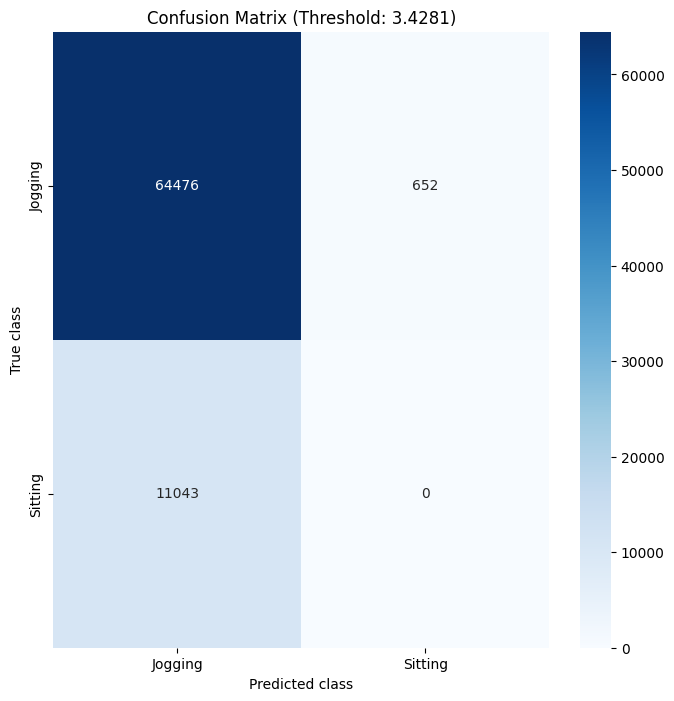

              precision    recall  f1-score   support

     Jogging       0.85      0.99      0.92     65128
     Sitting       0.00      0.00      0.00     11043

    accuracy                           0.85     76171
   macro avg       0.43      0.49      0.46     76171
weighted avg       0.73      0.85      0.78     76171



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. 'Jogging' (정상) 데이터의 재구성 오차만 필터링합니다.
jogging_error = error_df[error_df['true_class'] == 'Jogging']['reconstruction_error']

# 2. 정상 오차의 99% 퍼센타일을 임계값으로 설정합니다.
# 이 값을 넘어서는 오차는 '비정상(Sitting)'으로 간주합니다.
new_threshold = np.percentile(jogging_error, 99)

print(f"새로운 임계값 (Jogging 99% 퍼센타일): {new_threshold:.4f}")

# 3. 새로운 임계값을 적용하여 예측 레이블 재설정
# 0: Jogging (정상), 1: Sitting (비정상)
y_pred_new = [1 if e > new_threshold else 0 for e in error_df.reconstruction_error.values]

# Map predicted integer labels to string labels
LABELS = ['Jogging', 'Sitting']
y_pred_labels_new = [LABELS[p] for p in y_pred_new]

# 재평가 및 시각화
conf_matrix_new = confusion_matrix(error_df.true_class, y_pred_labels_new)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_new, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues");
plt.title(f"Confusion Matrix (Threshold: {new_threshold:.4f})")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred_labels_new))